<img align="right" src="https://ds-cs-images.s3.ap-northeast-2.amazonaws.com/Codestates_Fulllogo_Color.png" width=100>

## *DATA SCIENCE / SECTION 2 / SPRINT 1 / NOTE 3*

# 📝 Assignment
---

# Ridge Regression

이번 모듈에서 배운 내용을 조금 다른 데이터를 통해 복습해 봅시다. 데이터에 대한 정보는 다음 링크를 참조해 주세요.

- [Melbourne Housing Market]('https://www.kaggle.com/anthonypino/melbourne-housing-market')

이번에도 Price 변수를 target으로 정하고 모델을 구성해 봅시다.

In [1]:
import pandas as pd
from pandas_profiling import ProfileReport
from sklearn.model_selection import train_test_split

# get data
df = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/melbourne_house_prices/MELBOURNE_HOUSE_PRICES_LESS.csv')

# drop high cardinality cols
df.drop(columns=['Suburb','Address','SellerG','Date'], inplace=True)

# drop na values in Price
df.dropna(subset=['Price'], inplace=True)
display(df)
# drop duplicated rows
df.drop_duplicates(inplace=True)

display(df)

,Rooms,Type,Price,Method,Postcode,Regionname,Propertycount,Distance,CouncilArea
0,3,h,1490000.0,S,3067,Northern Metropolitan,4019,3.0,Yarra City Council
1,3,h,1220000.0,S,3067,Northern Metropolitan,4019,3.0,Yarra City Council
2,3,h,1420000.0,S,3067,Northern Metropolitan,4019,3.0,Yarra City Council
3,3,h,1515000.0,S,3040,Western Metropolitan,1543,7.5,Moonee Valley City Council
4,2,h,670000.0,S,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council
...,...,...,...,...,...,...,...,...,...
63016,2,u,347700.0,SP,3199,South-Eastern Metropolitan,17055,38.0,Frankston City Council
63017,3,h,808000.0,S,3072,Northern Metropolitan,14577,8.4,Darebin City Council
63018,3,h,566000.0,S,3064,Northern Metropolitan,5833,20.6,Hume City Council
63019,3,h,500000.0,S,3064,Northern Metropolitan,5833,20.6,Hume City Council


,Rooms,Type,Price,Method,Postcode,Regionname,Propertycount,Distance,CouncilArea
0,3,h,1490000.0,S,3067,Northern Metropolitan,4019,3.0,Yarra City Council
1,3,h,1220000.0,S,3067,Northern Metropolitan,4019,3.0,Yarra City Council
2,3,h,1420000.0,S,3067,Northern Metropolitan,4019,3.0,Yarra City Council
3,3,h,1515000.0,S,3040,Western Metropolitan,1543,7.5,Moonee Valley City Council
4,2,h,670000.0,S,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council
...,...,...,...,...,...,...,...,...,...
63015,2,u,340000.0,SP,3199,South-Eastern Metropolitan,17055,38.0,Frankston City Council
63016,2,u,347700.0,SP,3199,South-Eastern Metropolitan,17055,38.0,Frankston City Council
63017,3,h,808000.0,S,3072,Northern Metropolitan,14577,8.4,Darebin City Council
63018,3,h,566000.0,S,3064,Northern Metropolitan,5833,20.6,Hume City Council


### 1) 데이터의 특성을 파악하기 위해 pandas_profiling을 사용해 보세요.
- **범주형 특성으로 원핫인코딩이 꼭 필요한 특성의 갯수를 과제 제출폼에 제출하세요.**

In [2]:
# !pip install pandas_profiling
# !pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

In [5]:
from pandas_profiling import ProfileReport
profile = ProfileReport(df, title="Pandas Profiling Report", explorative=True)
profile

Summarize dataset:   0%|          | 0/23 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Pandas Profiling 결과
## Variable types
- Numeric 변수 = 6 개
- Categorical 변수 = 4 개
## Dataset 통계
- 변수 개수 : 10 개
- 샘플의 수 : 42515 개
- 결측치 : 0 개
- 중복 행 : 0 개
## 변수 특징
 1. df_index : Real number, 인덱스
    - UNIQUE 한 변수. 연관 없는 변수.
 2. Rooms : Real number, 객실 수
    - 분포 : 1 ~ 31
    - Type과 높은 상관관계를 가지고 있음
 3. Type : Categorical, 타입. h : 하우스, u : 유닛, t : 타운 하우스
    - h : 29637, u : 8360, t : 4518
    - Rooms와 높은 상관관계를 가지고 있음
 4. Price : Real number, 가격
    - 분포 : 85,000 ~ 11,200,000
 5. Method : Categorical, 판매 된 방법. S : 부동산 매각, SP : 이전에 매각 된 부동산, PI : 전달 된 속성, VB : 공급 업체 입찰, SA : 경매 후 판매
    - S : 26738, SP : 5830, PI : 5361, VB : 4235, SA : 351
 6. Postcode : Real number, 우편번호
    - 분포 : 3000 ~ 3980
    - Distance, Regionname, CouncilArea와 높은 상관관계를 가지고 있음
 7. Regionname : Categorical, 지역명
    - Northern, Southern, Western, Eastern, South-Eastern, Other values
    - Postcode, Distance, CouncilArea와 높은 상관관계를 가지고 있음
 8. Propertycount : Real number, 교외에있는 부동산 수.
    - 분포 : 39 ~ 21650
    - Distance, CouncilArea와 높은 상관 관계를 가지고 있음.
 9. Distance : Real number, CBD로부터의 거리 (킬로미터)
    - 분포 : 0 ~ 55.8
    - Podstcode, Regionname, Propertycount, CouncilArea와 높은 상관관계를 가지고 있음.
 10. CouncilArea : Categorical, 해당 지역의 관할위원회
    - Boroondara, Darebin, Banyule, Brimbank, Bayside, Other values
    - Postcode, Regionname, Propertycount, Distance와 높은 상관관계를 가지고 있음.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42515 entries, 0 to 63020
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rooms          42515 non-null  int64  
 1   Type           42515 non-null  object 
 2   Price          42515 non-null  float64
 3   Method         42515 non-null  object 
 4   Postcode       42515 non-null  int64  
 5   Regionname     42515 non-null  object 
 6   Propertycount  42515 non-null  int64  
 7   Distance       42515 non-null  float64
 8   CouncilArea    42515 non-null  object 
dtypes: float64(2), int64(3), object(4)
memory usage: 3.2+ MB


In [ ]:
onehot_df = df.iloc[:, [i for i in df.dtypes == object]]
onehot_df

,Type,Method,Regionname,CouncilArea
0,h,S,Northern Metropolitan,Yarra City Council
1,h,S,Northern Metropolitan,Yarra City Council
2,h,S,Northern Metropolitan,Yarra City Council
3,h,S,Western Metropolitan,Moonee Valley City Council
4,h,S,Western Metropolitan,Moonee Valley City Council
...,...,...,...,...
63015,u,SP,South-Eastern Metropolitan,Frankston City Council
63016,u,SP,South-Eastern Metropolitan,Frankston City Council
63017,h,S,Northern Metropolitan,Darebin City Council
63018,h,S,Northern Metropolitan,Hume City Council


In [ ]:
len(onehot_df.columns)

4

### 2) 범주형 변수들에 대해 one-hot encoding(category_encoders)을 수행하고 데이터를 train/test 셋으로 무작위로 나누어 주세요.(train/test = 80%/20%)
- [category_encoders.one_hot.OneHotEncoder](https://contrib.scikit-learn.org/category_encoders/onehot.html#one-hot), 파라미터는 use_cat_names = True 사용
- 데이터 분리는 [sklearn.model_selection.train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html?highlight=train%20test%20split#sklearn-model-selection-train-test-split) 을 사용해 주세요. 사용해야 하는 파라미터는 test_size, train_size, random_state=2 입니다. 나머지는 default 사용합니다.
- **분리된 학습데이터의 첫번째 샘플의 인덱스 값를 과제 제출폼에 제출하세요.**


In [ ]:
# 2가지 방법 : get_dummies, category_encoders.OneHotEncoder
# get_dummies
pd.get_dummies(onehot_df)

,Type_h,Type_t,Type_u,Method_PI,Method_S,Method_SA,Method_SP,Method_VB,Regionname_Eastern Metropolitan,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria,CouncilArea_Banyule City Council,CouncilArea_Bayside City Council,CouncilArea_Boroondara City Council,CouncilArea_Brimbank City Council,CouncilArea_Cardinia Shire Council,CouncilArea_Casey City Council,CouncilArea_Darebin City Council,CouncilArea_Frankston City Council,CouncilArea_Glen Eira City Council,CouncilArea_Greater Dandenong City Council,CouncilArea_Hobsons Bay City Council,CouncilArea_Hume City Council,CouncilArea_Kingston City Council,CouncilArea_Knox City Council,CouncilArea_Macedon Ranges Shire Council,CouncilArea_Manningham City Council,CouncilArea_Maribyrnong City Council,CouncilArea_Maroondah City Council,CouncilArea_Melbourne City Council,CouncilArea_Melton City Council,CouncilArea_Mitchell Shire Council,CouncilArea_Monash City Council,CouncilArea_Moonee Valley City Council,CouncilArea_Moorabool Shire Council,CouncilArea_Moreland City Council,CouncilArea_Murrindindi Shire Council,CouncilArea_Nillumbik Shire Council,CouncilArea_Port Phillip City Council,CouncilArea_Stonnington City Council,CouncilArea_Whitehorse City Council,CouncilArea_Whittlesea City Council,CouncilArea_Wyndham City Council,CouncilArea_Yarra City Council,CouncilArea_Yarra Ranges Shire Council
0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63015,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
63016,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
63017,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
63018,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# category_encoders.OneHotEncoder
X = onehot_df
y = df['Price']
# !pip install category_encoders
import category_encoders as ce

ce_one_hot = ce.OneHotEncoder(use_cat_names = True)
onehotencoder_df = ce_one_hot.fit_transform(X, y)
onehotencoder_df

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,Type_h,Type_t,Type_u,Method_S,Method_SP,Method_VB,Method_PI,Method_SA,Regionname_Northern Metropolitan,Regionname_Western Metropolitan,Regionname_Southern Metropolitan,Regionname_South-Eastern Metropolitan,Regionname_Eastern Metropolitan,Regionname_Northern Victoria,Regionname_Eastern Victoria,Regionname_Western Victoria,CouncilArea_Yarra City Council,CouncilArea_Moonee Valley City Council,CouncilArea_Port Phillip City Council,CouncilArea_Brimbank City Council,CouncilArea_Darebin City Council,CouncilArea_Hobsons Bay City Council,CouncilArea_Stonnington City Council,CouncilArea_Boroondara City Council,CouncilArea_Monash City Council,CouncilArea_Kingston City Council,CouncilArea_Maroondah City Council,CouncilArea_Bayside City Council,CouncilArea_Banyule City Council,CouncilArea_Glen Eira City Council,CouncilArea_Whitehorse City Council,CouncilArea_Maribyrnong City Council,CouncilArea_Hume City Council,CouncilArea_Moreland City Council,CouncilArea_Manningham City Council,CouncilArea_Melbourne City Council,CouncilArea_Melton City Council,CouncilArea_Frankston City Council,CouncilArea_Casey City Council,CouncilArea_Greater Dandenong City Council,CouncilArea_Nillumbik Shire Council,CouncilArea_Whittlesea City Council,CouncilArea_Knox City Council,CouncilArea_Wyndham City Council,CouncilArea_Yarra Ranges Shire Council,CouncilArea_Cardinia Shire Council,CouncilArea_Macedon Ranges Shire Council,CouncilArea_Mitchell Shire Council,CouncilArea_Moorabool Shire Council,CouncilArea_Murrindindi Shire Council
0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63015,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
63016,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
63017,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
63018,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(onehotencoder_df, y, test_size=0.20, random_state=2)

In [ ]:
X_train

,Type_h,Type_t,Type_u,Method_S,Method_SP,Method_VB,Method_PI,Method_SA,Regionname_Northern Metropolitan,Regionname_Western Metropolitan,Regionname_Southern Metropolitan,Regionname_South-Eastern Metropolitan,Regionname_Eastern Metropolitan,Regionname_Northern Victoria,Regionname_Eastern Victoria,Regionname_Western Victoria,CouncilArea_Yarra City Council,CouncilArea_Moonee Valley City Council,CouncilArea_Port Phillip City Council,CouncilArea_Brimbank City Council,CouncilArea_Darebin City Council,CouncilArea_Hobsons Bay City Council,CouncilArea_Stonnington City Council,CouncilArea_Boroondara City Council,CouncilArea_Monash City Council,CouncilArea_Kingston City Council,CouncilArea_Maroondah City Council,CouncilArea_Bayside City Council,CouncilArea_Banyule City Council,CouncilArea_Glen Eira City Council,CouncilArea_Whitehorse City Council,CouncilArea_Maribyrnong City Council,CouncilArea_Hume City Council,CouncilArea_Moreland City Council,CouncilArea_Manningham City Council,CouncilArea_Melbourne City Council,CouncilArea_Melton City Council,CouncilArea_Frankston City Council,CouncilArea_Casey City Council,CouncilArea_Greater Dandenong City Council,CouncilArea_Nillumbik Shire Council,CouncilArea_Whittlesea City Council,CouncilArea_Knox City Council,CouncilArea_Wyndham City Council,CouncilArea_Yarra Ranges Shire Council,CouncilArea_Cardinia Shire Council,CouncilArea_Macedon Ranges Shire Council,CouncilArea_Mitchell Shire Council,CouncilArea_Moorabool Shire Council,CouncilArea_Murrindindi Shire Council
602,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
40851,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
57233,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8816,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3481,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44542,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
43399,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8789,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
51700,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
y_train

602      1750000.0
40851     900000.0
57233     530000.0
8816      975000.0
3481      556000.0
           ...    
44542     695000.0
43399     490000.0
8789      830000.0
51700     380000.0
33935    1516000.0
Name: Price, Length: 34012, dtype: float64

### 3) SelectKBest를 사용해서 20개의 특성만 selection 하세요
- score_func 에는 f_regression을 사용합니다
- **가장 스코어(Attributes: scores_ 사용)가 높게 나온 특성의 이름을 과제 제출폼에 제출하세요.**

In [ ]:
# 특성자동선택 SelectKBest(개수), SelectPercentile(비율)
def mySelectKBest(X, y, n):
  from sklearn.feature_selection import SelectKBest, f_regression
  
  select = SelectKBest(f_regression, k=n).fit(X, y)
  X_selected = select.transform(X)

  # 점수 표 내림 차순
  score = select.scores_
  import pandas as pd
  print('\n점수 표 내림 차순')
  display(pd.DataFrame([score], index = ['score'], columns = X.columns).sort_values(by = 'score', axis = 1, ascending = False))

  # X 형태
  print('\nX 형태 변환 과정')
  print("X.shape: {} ".format(X.shape))
  print("X_selected.shape: {} ".format(X_selected.shape))
  
  # 마스킹 시각화 검은 부분이 True, 흰 부분이 False
  mask = select.get_support()
  import matplotlib.pyplot as plt
  plt.matshow(mask.reshape(1, -1), cmap='gray_r')
  plt.xlabel("feature number")
  plt.yticks([0])
  plt.title("RFE")
  print('\n마스킹 시각화. True = Black, False = White')
  plt.show()

  # 출력
  print('\nOutput :')
  print('{}개의 pvalue 값에 따른 최고 점수의 feature : {} 선택'.format(n, list(X.iloc[:,mask].columns)))
  display(X.iloc[:,mask])

In [ ]:
pd.DataFrame([[1, 0, 0, 0]], columns = X.columns, index = ['score']).sort_values(by = 'score', axis = 1)

,Method,Regionname,CouncilArea,Type
score,0,0,0,1


/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):



점수 표 내림 차순


,Regionname_Southern Metropolitan,Type_u,Type_h,CouncilArea_Boroondara City Council,Regionname_Northern Metropolitan,CouncilArea_Bayside City Council,Regionname_Western Metropolitan,CouncilArea_Stonnington City Council,CouncilArea_Hume City Council,CouncilArea_Brimbank City Council,CouncilArea_Whittlesea City Council,CouncilArea_Wyndham City Council,Method_SP,Method_VB,CouncilArea_Melton City Council,Regionname_South-Eastern Metropolitan,CouncilArea_Frankston City Council,CouncilArea_Greater Dandenong City Council,CouncilArea_Manningham City Council,CouncilArea_Monash City Council,Regionname_Western Victoria,CouncilArea_Maribyrnong City Council,Regionname_Northern Victoria,CouncilArea_Moreland City Council,Type_t,CouncilArea_Casey City Council,CouncilArea_Darebin City Council,Regionname_Eastern Victoria,Regionname_Eastern Metropolitan,CouncilArea_Banyule City Council,CouncilArea_Port Phillip City Council,CouncilArea_Glen Eira City Council,Method_PI,CouncilArea_Maroondah City Council,CouncilArea_Knox City Council,CouncilArea_Nillumbik Shire Council,CouncilArea_Yarra Ranges Shire Council,CouncilArea_Yarra City Council,CouncilArea_Kingston City Council,CouncilArea_Cardinia Shire Council,CouncilArea_Whitehorse City Council,CouncilArea_Melbourne City Council,CouncilArea_Macedon Ranges Shire Council,CouncilArea_Mitchell Shire Council,CouncilArea_Moonee Valley City Council,Method_SA,CouncilArea_Moorabool Shire Council,Method_S,CouncilArea_Hobsons Bay City Council,CouncilArea_Murrindindi Shire Council
score,6788.058344,4452.034986,4275.357663,4272.519334,1418.535374,1400.847314,1181.967384,1022.182371,1011.046168,808.063815,800.609691,528.262796,468.938372,384.070006,304.612647,281.937554,185.438825,164.314777,164.054036,156.898216,152.091995,142.581148,125.215592,122.750986,122.707638,119.650786,96.835861,94.544108,90.831008,87.845681,86.008798,73.781885,68.586656,60.883865,43.495014,41.142305,32.726924,31.193459,30.848937,29.225487,25.284211,14.824778,13.866834,12.999789,9.464095,8.250164,8.200147,3.640543,0.169096,0.154973



X 형태 변환 과정
X.shape: (42515, 50) 
X_selected.shape: (42515, 20) 

마스킹 시각화. True = Black, False = White


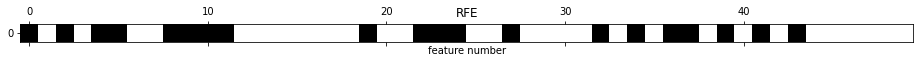


Output :
20개의 pvalue 값에 따른 최고 점수의 feature : ['Type_h', 'Type_u', 'Method_SP', 'Method_VB', 'Regionname_Northern Metropolitan', 'Regionname_Western Metropolitan', 'Regionname_Southern Metropolitan', 'Regionname_South-Eastern Metropolitan', 'CouncilArea_Brimbank City Council', 'CouncilArea_Stonnington City Council', 'CouncilArea_Boroondara City Council', 'CouncilArea_Monash City Council', 'CouncilArea_Bayside City Council', 'CouncilArea_Hume City Council', 'CouncilArea_Manningham City Council', 'CouncilArea_Melton City Council', 'CouncilArea_Frankston City Council', 'CouncilArea_Greater Dandenong City Council', 'CouncilArea_Whittlesea City Council', 'CouncilArea_Wyndham City Council'] 선택


,Type_h,Type_u,Method_SP,Method_VB,Regionname_Northern Metropolitan,Regionname_Western Metropolitan,Regionname_Southern Metropolitan,Regionname_South-Eastern Metropolitan,CouncilArea_Brimbank City Council,CouncilArea_Stonnington City Council,CouncilArea_Boroondara City Council,CouncilArea_Monash City Council,CouncilArea_Bayside City Council,CouncilArea_Hume City Council,CouncilArea_Manningham City Council,CouncilArea_Melton City Council,CouncilArea_Frankston City Council,CouncilArea_Greater Dandenong City Council,CouncilArea_Whittlesea City Council,CouncilArea_Wyndham City Council
0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63015,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
63016,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
63017,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
63018,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [ ]:
mySelectKBest(ce_one_hot.fit_transform(X, y), y, 20)


점수 표 내림 차순


,Regionname_Southern Metropolitan,Type_u,Type_h,CouncilArea_Boroondara City Council,Regionname_Northern Metropolitan,CouncilArea_Bayside City Council,Regionname_Western Metropolitan,CouncilArea_Stonnington City Council,CouncilArea_Hume City Council,CouncilArea_Brimbank City Council,CouncilArea_Whittlesea City Council,CouncilArea_Wyndham City Council,Method_SP,Method_VB,CouncilArea_Melton City Council,Regionname_South-Eastern Metropolitan,CouncilArea_Manningham City Council,CouncilArea_Frankston City Council,CouncilArea_Greater Dandenong City Council,Regionname_Western Victoria,CouncilArea_Maribyrnong City Council,CouncilArea_Monash City Council,Type_t,CouncilArea_Casey City Council,CouncilArea_Moreland City Council,Regionname_Northern Victoria,Regionname_Eastern Metropolitan,Regionname_Eastern Victoria,CouncilArea_Darebin City Council,CouncilArea_Banyule City Council,CouncilArea_Glen Eira City Council,CouncilArea_Port Phillip City Council,CouncilArea_Maroondah City Council,Method_PI,CouncilArea_Knox City Council,CouncilArea_Nillumbik Shire Council,CouncilArea_Yarra City Council,CouncilArea_Yarra Ranges Shire Council,CouncilArea_Cardinia Shire Council,CouncilArea_Whitehorse City Council,CouncilArea_Kingston City Council,CouncilArea_Mitchell Shire Council,CouncilArea_Macedon Ranges Shire Council,CouncilArea_Moonee Valley City Council,CouncilArea_Moorabool Shire Council,CouncilArea_Melbourne City Council,Method_SA,Method_S,CouncilArea_Murrindindi Shire Council,CouncilArea_Hobsons Bay City Council
score,5292.991447,3601.177189,3463.973018,3266.534846,1130.022259,1127.261257,936.929364,872.533532,814.38173,638.039034,637.945026,409.675454,371.085374,313.176886,239.7548,212.740362,139.37221,138.586421,130.26344,122.890819,121.012219,120.781309,99.593958,97.426182,96.294133,94.792272,80.736136,76.599581,71.79636,69.355786,58.520826,55.731613,49.710884,49.315308,35.327493,32.947664,30.668043,26.135295,23.344156,21.894724,21.281756,12.290781,9.93011,8.148758,7.376801,6.507978,5.488497,2.72124,0.155238,0.055165



X 형태 변환 과정
X.shape: (34012, 50) 
X_selected.shape: (34012, 20) 

마스킹 시각화. True = Black, False = White


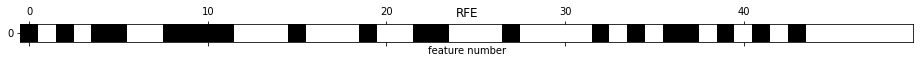


Output :
20개의 pvalue 값에 따른 최고 점수의 feature : ['Type_h', 'Type_u', 'Method_SP', 'Method_VB', 'Regionname_Northern Metropolitan', 'Regionname_Western Metropolitan', 'Regionname_Southern Metropolitan', 'Regionname_South-Eastern Metropolitan', 'Regionname_Western Victoria', 'CouncilArea_Brimbank City Council', 'CouncilArea_Stonnington City Council', 'CouncilArea_Boroondara City Council', 'CouncilArea_Bayside City Council', 'CouncilArea_Hume City Council', 'CouncilArea_Manningham City Council', 'CouncilArea_Melton City Council', 'CouncilArea_Frankston City Council', 'CouncilArea_Greater Dandenong City Council', 'CouncilArea_Whittlesea City Council', 'CouncilArea_Wyndham City Council'] 선택


,Type_h,Type_u,Method_SP,Method_VB,Regionname_Northern Metropolitan,Regionname_Western Metropolitan,Regionname_Southern Metropolitan,Regionname_South-Eastern Metropolitan,Regionname_Western Victoria,CouncilArea_Brimbank City Council,CouncilArea_Stonnington City Council,CouncilArea_Boroondara City Council,CouncilArea_Bayside City Council,CouncilArea_Hume City Council,CouncilArea_Manningham City Council,CouncilArea_Melton City Council,CouncilArea_Frankston City Council,CouncilArea_Greater Dandenong City Council,CouncilArea_Whittlesea City Council,CouncilArea_Wyndham City Council
602,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
40851,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
57233,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8816,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3481,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44542,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
43399,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8789,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
51700,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [ ]:
mySelectKBest(X_train, y_train, 20)

### 4) RidgeCV를 사용해서 회귀모델을 만들어 보세요
- attribute는 normalize=True, cv=5를 사용하세요. 나머지는 default
- **alphas = [0, 0.001, 0.01, 0.1, 1] 을 시도해보고 가장 좋은 점수가 나온 alpha 값을 과제 제출폼에 제출하세요.**

In [ ]:
from sklearn.linear_model import RidgeCV
clf = RidgeCV(normalize = True, cv = 5, alphas=[0, 0.001, 0.01, 0.1, 1]).fit(X_train, y_train)
clf.score(X_train, y_train)

0.46117290262120814

In [ ]:
# alpha_per_target -> 0.24 버전에서 새로 업데이트 되었다.
# !pip install scikit-learn==0.24
from sklearn.linear_model import RidgeCV
alphas = [0, 0.001, 0.01, 0.1, 1]

# Find optimal alpha for each target
optimal_alphas = RidgeCV(normalize = True, cv = 5, alphas=alphas).fit(X_train, y_train).alpha_
optimal_alphas

0.001

In [ ]:
from sklearn.linear_model import RidgeCV

alphas = [0, 0.001, 0.01, 0.1, 1] 

ridge = RidgeCV(alphas=alphas, normalize=True, cv=5)
ridge.fit(X_train, y_train)
print("alpha: ", ridge.alpha_)
print("best score: ", ridge.best_score_)

alpha:  0.001
best score:  0.46027545881807497


### 5) 테스트셋에 대한 MAE 값을 계산하고 모델이 잘 만들어졌는지 확인해 보세요.
- **테스트셋에 대한 MAE 값을 과제 제출폼에 제출하세요.**

In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score

model = RidgeCV(normalize = True, cv = 5, alphas=alphas).fit(X_train, y_train)
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:
mae

287359.23591524054

## 🔥 도전과제

### 6) best ridge regression model을 만드세요.
    - 특성의 갯수에 제한이 없습니다.
    - 다항회귀를 사용하세요
    - 여러 람다값을 시도하세요
    - 람다 0인 경우를 비교하세요
    - RidgeCV를 사용하세요
    - 만든 모델의 특징을 간략히 설명하고 테스트세트 성능 결과를 메신저에서 공유하세요

In [ ]:
### 이곳에서 과제를 진행해 주세요 ###